In [ ]:
import numpy as np
import pandas as pd
import math

**Data Preprocessing**

In [ ]:
# Training data
anger_train = pd.read_csv('/content/drive/MyDrive/Data Science Mk/Projects/Emotional Intensity/anger_train.txt', sep='\t', names=['index', 'tweet', 'Emotion', 'score'])
fear_train = pd.read_csv('/content/drive/MyDrive/Data Science Mk/Projects/Emotional Intensity/fear_train.txt',  sep='\t', names=['index', 'tweet', 'Emotion', 'score'])
joy_train = pd.read_csv('/content/drive/MyDrive/Data Science Mk/Projects/Emotional Intensity/joy_train.txt',  sep='\t', names=['index', 'tweet', 'Emotion', 'score'])
sadness_train = pd.read_csv('/content/drive/MyDrive/Data Science Mk/Projects/Emotional Intensity/sadness_train.txt',  sep='\t', names=['index', 'tweet', 'Emotion', 'score'])

In [ ]:
anger_train.head(3)

,index,tweet,Emotion,score
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896


In [ ]:
# Validation data
anger_dev_with_intensity = pd.read_csv('/content/drive/MyDrive/Data Science Mk/Projects/Emotional Intensity/anger_dev_w.txt',  sep='\t', names=['index', 'tweet', 'Emotion', 'score'])
fear_dev_with_intensity = pd.read_csv('/content/drive/MyDrive/Data Science Mk/Projects/Emotional Intensity/fear_dev_w.txt',  sep='\t', names=['index', 'tweet', 'Emotion', 'score'])
joy_dev_with_intensity = pd.read_csv('/content/drive/MyDrive/Data Science Mk/Projects/Emotional Intensity/joy_dev_w.txt',  sep='\t', names=['index', 'tweet', 'Emotion', 'score'])
sadness_dev_with_intensity = pd.read_csv('/content/drive/MyDrive/Data Science Mk/Projects/Emotional Intensity/sadness_dev_w.txt',  sep='\t', names=['index', 'tweet', 'Emotion', 'score'])


anger_dev = pd.read_csv('/content/drive/MyDrive/Data Science Mk/Projects/Emotional Intensity/anger_dev.txt',  sep='\t', names=['tweet', 'Emotion','score'])
anger_dev.reset_index(drop=False, inplace=True)
anger_dev.drop('score', axis=1, inplace=True)

fear_dev = pd.read_csv('/content/drive/MyDrive/Data Science Mk/Projects/Emotional Intensity/fear_dev.txt',  sep='\t', names=['tweet', 'Emotion','score'])
fear_dev.reset_index(drop=False, inplace=True)
fear_dev.drop('score', axis=1, inplace=True)

joy_dev = pd.read_csv('/content/drive/MyDrive/Data Science Mk/Projects/Emotional Intensity/joy_dev.txt',  sep='\t', names=['tweet', 'Emotion','score'])
joy_dev.reset_index(drop=False, inplace=True)
joy_dev.drop('score', axis=1, inplace=True)

sadness_dev = pd.read_csv('/content/drive/MyDrive/Data Science Mk/Projects/Emotional Intensity/sadness_dev.txt',  sep='\t', names=['tweet', 'Emotion','score'])
sadness_dev.reset_index(drop=False, inplace=True)
sadness_dev.drop('score', axis=1, inplace=True)

In [ ]:
anger_dev_with_intensity.head(3)

,index,tweet,Emotion,score
0,10941,At the point today where if someone says somet...,anger,0.319
1,10942,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger,0.144
2,10943,This game has pissed me off more than any othe...,anger,0.898


In [ ]:
anger_dev.head(3)

,index,tweet,Emotion
0,10857,@ZubairSabirPTI pls dont insult the word 'Molna',anger
1,10858,@ArcticFantasy I would have almost took offens...,anger
2,10859,@IllinoisLoyalty that Rutgers game was an abom...,anger


In [ ]:
# Test data
anger_test_with_intensity = pd.read_csv('/content/drive/MyDrive/Data Science Mk/Projects/Emotional Intensity/anger_test_w.txt',  sep='\t', names=['index', 'tweet', 'Emotion', 'score'])
fear_test_with_intensity = pd.read_csv('/content/drive/MyDrive/Data Science Mk/Projects/Emotional Intensity/fear_test_w.txt',  sep='\t', names=['index', 'tweet', 'Emotion', 'score'])
joy_test_with_intensity = pd.read_csv('/content/drive/MyDrive/Data Science Mk/Projects/Emotional Intensity/joy_test_w.txt',  sep='\t', names=['index', 'tweet', 'Emotion', 'score'])
sadness_test_with_intensity = pd.read_csv('/content/drive/MyDrive/Data Science Mk/Projects/Emotional Intensity/sadness_test_w.txt',  sep='\t', names=['index', 'tweet', 'Emotion', 'score'])


anger_test = pd.read_csv('/content/drive/MyDrive/Data Science Mk/Projects/Emotional Intensity/anger_test.txt',  sep='\t', names=['index', 'tweet', 'Emotion','score'])
anger_test.drop('score', axis=1, inplace=True)

fear_test = pd.read_csv('/content/drive/MyDrive/Data Science Mk/Projects/Emotional Intensity/fear_test.txt',  sep='\t', names=['index', 'tweet', 'Emotion','score'])
fear_test.drop('score', axis=1, inplace=True)

joy_test = pd.read_csv('/content/drive/MyDrive/Data Science Mk/Projects/Emotional Intensity/joy_test.txt',  sep='\t', names=['index', 'tweet', 'Emotion','score'])
joy_test.drop('score', axis=1, inplace=True)

sadness_test = pd.read_csv('/content/drive/MyDrive/Data Science Mk/Projects/Emotional Intensity/sadness_test.txt',  sep='\t', names=['index','tweet', 'Emotion','score'])
sadness_test.drop('score', axis=1, inplace=True)

In [ ]:
anger_test_with_intensity.head(3)

,index,tweet,Emotion,score
0,10941,At the point today where if someone says somet...,anger,0.319
1,10942,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger,0.144
2,10943,This game has pissed me off more than any othe...,anger,0.898


In [ ]:
anger_test.head(3)

,index,tweet,Emotion
0,10941,At the point today where if someone says somet...,anger
1,10942,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger
2,10943,This game has pissed me off more than any othe...,anger


In [ ]:
all_train_data = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

all_dev_data = pd.concat([anger_dev, fear_dev, joy_dev, sadness_dev], ignore_index=True)

all_test_data = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

all_test_data_with_intensity = pd.concat([anger_test_with_intensity, fear_test_with_intensity, joy_test_with_intensity, sadness_test_with_intensity], ignore_index=True)

In [ ]:
all_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3613 entries, 0 to 3612
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    3613 non-null   int64  
 1   tweet    3613 non-null   object 
 2   Emotion  3613 non-null   object 
 3   score    3613 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 113.0+ KB


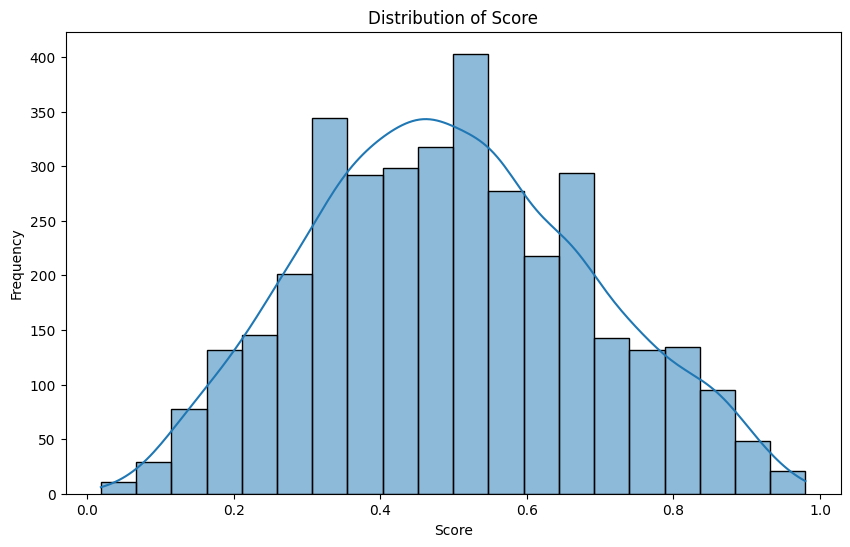

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(all_train_data['score'], bins=20, kde=True)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Score')
plt.show()

In [ ]:
all_dev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    347 non-null    int64 
 1   tweet    347 non-null    object
 2   Emotion  347 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.3+ KB


In [ ]:
all_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    3142 non-null   int64 
 1   tweet    3142 non-null   object
 2   Emotion  3142 non-null   object
dtypes: int64(1), object(2)
memory usage: 73.8+ KB


**VADER** (Valence Aware Dictionary and sEntiment Reasoner) lexicon

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
def get_vader_sentiment_score(text):
    scores = sia.polarity_scores(text)
    return scores['compound']

In [ ]:
all_train_data['vader_score'] = all_train_data['tweet'].apply(get_vader_sentiment_score)

all_dev_data['vader_score'] = all_dev_data['tweet'].apply(get_vader_sentiment_score)

all_test_data['vader_score'] = all_test_data['tweet'].apply(get_vader_sentiment_score)

In [ ]:
from sklearn.metrics import mean_squared_error

rmse_test = math.sqrt(mean_squared_error(all_test_data_with_intensity['score'], all_test_data['vader_score']))
print(f"Root Mean Squared Error on Test Set: {rmse_test}")

Root Mean Squared Error on Test Set: 0.7574514805758056


**Lexicon-Based Approach**

In [ ]:
nrc_lexicon = pd.read_csv('/content/drive/MyDrive/Data Science Mk/Projects/Emotional Intensity/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt',
                          sep='\t', header=None, names=['word', 'emotion', 'score'])

In [ ]:
def assign_emotion_labels(text):
    emotions = set()
    for word in text.split():
        matches = nrc_lexicon[(nrc_lexicon['word'] == word) & (nrc_lexicon['score'] == 1)]
        if not matches.empty:
            emotions.update(matches['emotion'])
    return list(emotions)

In [ ]:
all_train_data['emotions'] = all_train_data['tweet'].apply(assign_emotion_labels)

all_dev_data['emotions'] = all_dev_data['tweet'].apply(assign_emotion_labels)

all_test_data['emotions'] = all_test_data['tweet'].apply(assign_emotion_labels)

In [ ]:
all_test_data.head(3)

,index,tweet,Emotion,vader_score,emotions
0,10941,At the point today where if someone says somet...,anger,0.5267,"[positive, joy, trust]"
1,10942,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger,0.0000,[]
2,10943,This game has pissed me off more than any othe...,anger,-0.6988,[]


In [ ]:
all_test_data['emotions_tuple'] = all_test_data['emotions'].apply(tuple)

emotion_counts = all_test_data['emotions_tuple'].value_counts()
emotion_counts

()                                                843
(positive,)                                       122
(anger, disgust, negative, fear, sadness)         109
(joy, trust, surprise, positive, anticipation)    106
(positive, joy)                                   105
                                                 ... 
(positive, surprise, sadness)                       1
(surprise, disgust, negative, fear, sadness)        1
(trust, surprise, disgust, negative, fear)          1
(surprise, negative, fear, anticipation)            1
(positive, anticipation, sadness)                   1
Name: emotions_tuple, Length: 332, dtype: int64

In [ ]:
emotion_counts = all_test_data['emotions'].explode().value_counts()
emotion_counts

negative        1450
positive        1285
fear             933
sadness          908
anger            880
anticipation     857
joy              809
trust            786
disgust          603
surprise         519
Name: emotions, dtype: int64

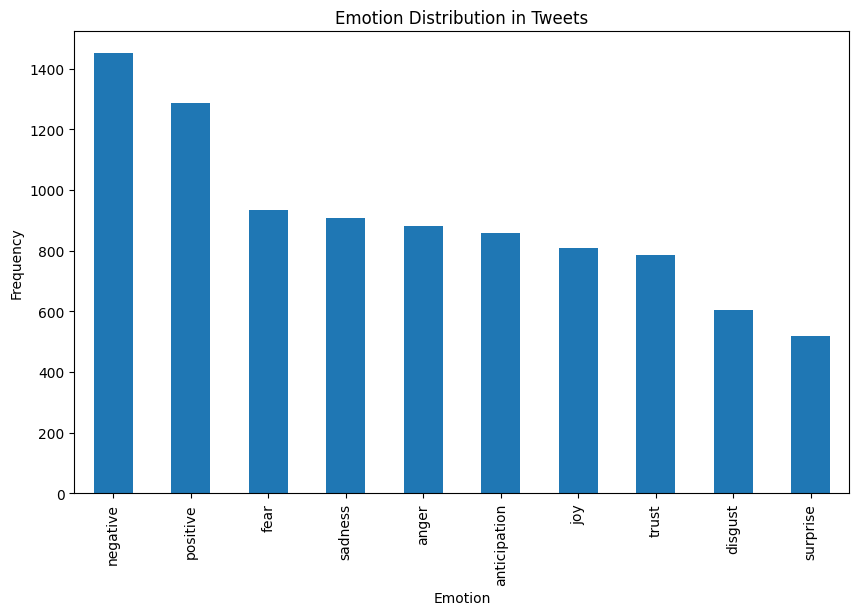

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Emotion Distribution in Tweets')
plt.show()

In [ ]:
joy_tweets = all_test_data[all_test_data['emotions'].apply(lambda x: 'joy' in x)]
joy_tweets[['tweet', 'emotions']]

,tweet,emotions
0,At the point today where if someone says somet...,"[positive, joy, trust]"
3,@spamvicious I've just found out it's Candice ...,"[positive, joy, trust]"
7,@virginmedia I've been disconnected whilst on ...,"[sadness, joy, positive, negative, anticipation]"
8,@virginmedia I've been disconnected whilst on ...,"[sadness, joy, positive, negative, anticipation]"
9,I wanna see you smile I don't wanna see you ma...,"[joy, trust, surprise, positive, negative, sad..."
...,...,...
3121,"@ExaltedChampion - the jest, Kara didn't chuck...","[joy, positive, negative, fear, sadness]"
3125,Boy oh boy! our weekday schedule is crazy! But...,"[joy, trust, surprise, positive, negative, sad..."
3129,@Aamnaa___ @drkarthik_n your per capita income...,"[sadness, joy, trust, positive, negative, anti..."
3134,Nutella is pine green forget me nots are ivory...,"[joy, trust, anticipation, positive, negative,..."


In [ ]:
all_test_data.columns

Index(['index', 'tweet', 'Emotion', 'vader_score', 'emotions',
       'emotions_tuple'],
      dtype='object')

In [ ]:
def get_sentiment(emotions):
    if 'joy' in emotions or 'trust' in emotions:
        return 'Positive'
    elif 'sadness' in emotions or 'fear' in emotions or 'anger' in emotions:
        return 'Negative'
    else:
        return 'Neutral'

all_test_data['sentiment'] = all_test_data['emotions'].apply(get_sentiment)

In [ ]:
all_test_data['emotions_tuple'] = all_test_data['emotions'].apply(tuple)


emotion_groups = all_test_data.groupby('emotions_tuple')

for emotion, group in emotion_groups:
    print(f"Emotion: {emotion}")
    print(group[['tweet', 'sentiment']])
    print()

Emotion: ()
                                                  tweet sentiment
1     @CorningFootball  IT'S GAME DAY!!!!      T MIN...   Neutral
2     This game has pissed me off more than any othe...   Neutral
4     @moocowward @mrsajhargreaves @Melly77 @GaryBar...   Neutral
5     @moocowward @mrsajhargreaves @Melly77 @GaryBar...   Neutral
15                     I just got murdered in madden. 🤕   Neutral
...                                                 ...       ...
3131  Winner #Champion #school #lastyear #gouniversi...   Neutral
3133  @pottermore : I can't find my patronus, the we...   Neutral
3135    I was not made for this world. #empath #unhappy   Neutral
3136  She used to be beautiful, but she lived her li...   Neutral
3138  @redBus_in #unhappy with #redbus CC, when I ta...   Neutral

[843 rows x 2 columns]

Emotion: ('anger',)
                                                 tweet sentiment
255     Yeah I'm hot nigga, they say im burning uhhhhh  Negative
652  Changed my cloth

In [ ]:
def map_emotions_to_sentiment(emotions):
    if 'anger' in emotions or 'sadness' in emotions:
        return 'Negative'
    elif 'fear' in emotions:
        return 'Neutral'
    elif 'joy' in emotions:
        return 'Positive'
    else:
        return 'Unknown'

all_test_data['actual_sentiment'] = all_test_data['Emotion'].apply(map_emotions_to_sentiment)

In [ ]:
emotion_groups.head()

,index,tweet,Emotion,vader_score,emotions,emotions_tuple,sentiment,actual_sentiment
0,10941,At the point today where if someone says somet...,anger,0.5267,"[positive, joy, trust]","(positive, joy, trust)",Positive,Negative
1,10942,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger,0.0000,[],(),Neutral,Negative
2,10943,This game has pissed me off more than any othe...,anger,-0.6988,[],(),Neutral,Negative
3,10944,@spamvicious I've just found out it's Candice ...,anger,0.4215,"[positive, joy, trust]","(positive, joy, trust)",Positive,Negative
4,10945,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.0000,[],(),Neutral,Negative
...,...,...,...,...,...,...,...,...
3112,41503,On the wheel as we grow older and become aware...,sadness,-0.4019,"[joy, trust, anticipation, positive, negative,...","(joy, trust, anticipation, positive, negative,...",Positive,Negative
3121,41512,"@ExaltedChampion - the jest, Kara didn't chuck...",sadness,-0.2865,"[joy, positive, negative, fear, sadness]","(joy, positive, negative, fear, sadness)",Positive,Negative
3134,41525,Nutella is pine green forget me nots are ivory...,sadness,0.0516,"[joy, trust, anticipation, positive, negative,...","(joy, trust, anticipation, positive, negative,...",Positive,Negative
3140,41531,I'm buying art supplies and I'm debating how s...,sadness,-0.0772,"[sadness, joy, surprise, positive, anticipation]","(sadness, joy, surprise, positive, anticipation)",Positive,Negative


In [ ]:
accuracy = (all_test_data['sentiment'] == all_test_data['actual_sentiment']).mean()
print(f"Accuracy: {accuracy}")

Accuracy: 0.42329726288987907


In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(all_test_data['actual_sentiment'], all_test_data['sentiment'])
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[516 504 413]
 [330 405 260]
 [ 51 254 409]]


In [ ]:
from sklearn.metrics import classification_report

class_report = classification_report(all_test_data['actual_sentiment'], all_test_data['sentiment'])
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.58      0.36      0.44      1433
     Neutral       0.35      0.41      0.38       995
    Positive       0.38      0.57      0.46       714

    accuracy                           0.42      3142
   macro avg       0.43      0.45      0.42      3142
weighted avg       0.46      0.42      0.42      3142



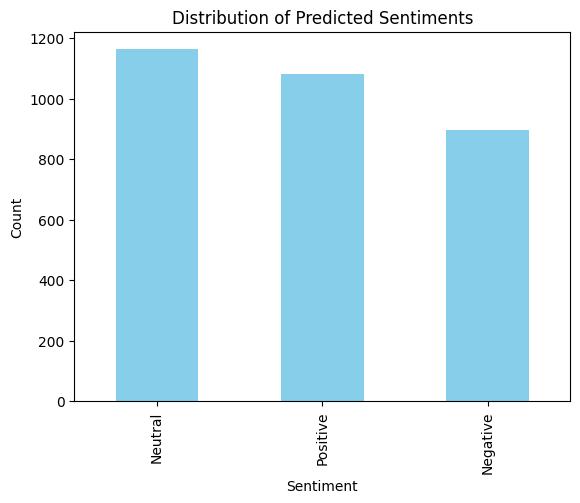

In [ ]:
import matplotlib.pyplot as plt

sentiment_counts = all_test_data['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Predicted Sentiments')
plt.show()

In [ ]:
for sentiment, group in all_test_data.groupby('sentiment'):
    print(f"Sentiment: {sentiment}")
    for i, row in group.sample(min(5, len(group))).iterrows():
        print(row['tweet'])
    print()

Sentiment: Negative
Last night I had a dream that today was Christmas. I woke up screaming because I wasn't ready. 
@omgitsbrittanyy @WittLowry u probably irritate the shit out of him always talking to him. He could probably give 2 shits about u lol 🖕🏻
@jamiesmart Huh! It's always my fault isn't it &gt;:( #huff #sulk
@MatherFamilys @SDICenter @CAllstadt \n\ndo REDNECKS intellectually intimidate you and force you to be their dancing clown?
@RealTimBooth I've never been fond of having dark eyes until seeing this share.

Sentiment: Neutral
Tho we haven't talked Jeff but the news is so sad and shocking. R.I.P Jeffrey
@TheCatCampbell I too am Ravenclaw. #sadness #shouldhavebeenhufflepuff
@stephtikkanen oh so true, so true. 
@kcbbcxo don't get discouraged! it's early on &amp; it can get overwhelming. keep reading &amp; use cue cards 😊 it'll get better!!
Everyday I wake up, a different @SpursOfficial player signs a contract extension! Love it!! #future #is #bright #COYS

Sentiment: Positive
W

In [ ]:
for sentiment, group in all_test_data.groupby('sentiment'):
    print(f"Sentiment: {sentiment}")
    emotion_counts = group['emotions'].explode().value_counts()
    print(emotion_counts)
    print()

Sentiment: Negative
negative        853
fear            601
sadness         561
anger           551
disgust         361
anticipation    198
positive        151
surprise        118
Name: emotions, dtype: int64

Sentiment: Neutral
positive        157
anticipation    100
negative         93
surprise         23
disgust          19
Name: emotions, dtype: int64

Sentiment: Positive
positive        977
joy             809
trust           786
anticipation    559
negative        504
surprise        378
sadness         347
fear            332
anger           329
disgust         223
Name: emotions, dtype: int64

